In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [6]:
dataset = pd.read_csv(r"c:\Users\marnes.simao.cassule\Documents\datas\mestrado\tdah_voluntario.csv")

In [7]:
dataset

,Grupo1TDAH2Controle,Sexo,Younger/older,Idade anos,Diagnóstico,AutomContra100,AutomContra800,AutomIpsoa100,AutomIpso800,VoluntInvalida300,VoluntInvalida800,Volvalida300,VoluntValida800
0,1,1,1,6,1,874.50,735.80,758.15,719.70,739.5,509.5,671.0,613.0
1,1,1,1,6,1,736.00,682.50,720.00,638.00,840.0,880.5,631.0,582.0
2,1,1,1,7,1,452.65,338.00,418.85,378.15,476.0,349.5,428.0,363.0
3,1,2,1,8,1,875.00,865.50,836.50,567.00,667.0,555.0,533.5,440.5
4,1,1,1,8,1,454.45,410.85,417.25,429.15,390.5,420.0,412.0,390.0
5,1,1,1,8,1,717.00,512.00,667.00,599.00,509.0,479.5,503.0,555.0
6,1,2,1,8,1,643.50,462.50,428.50,398.00,630.5,653.0,495.5,456.5
7,1,1,1,8,1,770.80,639.65,563.10,682.80,699.0,483.5,509.5,511.5
8,1,1,1,9,1,714.50,550.00,685.50,579.00,766.0,690.5,649.0,505.0
9,1,1,1,9,1,550.50,493.15,522.95,451.95,354.5,423.0,380.5,312.5


In [15]:
X = dataset.iloc[:,[5,6,7,8,9,10,11,12]].values

In [22]:
from sklearn.cluster import KMeans

wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

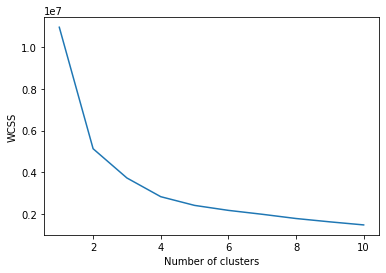

In [23]:
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
y_means = kmeans.fit_predict(X)

In [25]:
y_means

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [37]:
X[y_means == 0, 0]

array([ 874.5 ,  736.  ,  875.  ,  717.  ,  770.8 ,  714.5 ,  718.75,
        712.65,  615.  ,  717.  ,  876.  ,  757.25,  693.5 ,  703.05,
        917.5 ,  639.5 ,  615.  ,  670.5 , 1084.5 ,  808.  ,  693.  ,
        753.5 ,  753.5 ,  637.5 ])

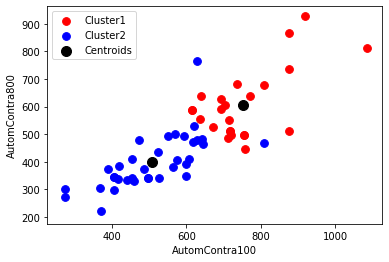

In [38]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0,1], s = 60, c = "red", label = 'Cluster1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1,1], s = 60, c = "blue", label = 'Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('AutomContra100') 
plt.ylabel('AutomContra800') 
plt.legend() 